In [5]:
library('tidyverse')
library('rvest') # Used for web scraping
library('lubridate')
options(repr.plot.res = 300, repr.plot.width = 6, repr.plot.height = 6)

We are going to recreate this chart from FiveThirtyEight.

For this graph, we need year, sex, winning time, name of the winner, and country.

Name Country Sex Year WinningTime

In [4]:
scrape_table = function(i, MF='Women\'s') {
    url = "https://www.baa.org/races/boston-marathon/results/champions"
    webpage = xml2::read_html(url)
    tbl = html_nodes(webpage, "table")[[i]] %>%
        html_table() %>%
        drop_na() %>%
        magrittr::set_colnames(c('year', 'name', 'country', 'time')) %>%
        mutate(time = hms(time)) %>%
        mutate(race.time = as.numeric(time, 'hours')) %>%
        mutate(MF = MF) %>%
        mutate(
            country.simple = ifelse(
                country %in% c('United States', 'Ethiopia', 'Japan', 'Kenya'),
                country,
                'other'
            )
        )
    tbl
}

df.men = scrape_table(1, MF='Men\'s')
df.women = scrape_table(2)

df.marathon = rbind(df.men, df.women)

df.marathon %>% head

year,name,country,time,race.time,MF,country.simple
<int>,<chr>,<chr>,<Period>,<dbl>,<chr>,<chr>
2019,Lawrence Cherono,Kenya,2H 7M 57S,2.132500,Men's,Kenya
2018,Yuki Kawauchi,Japan,2H 15M 58S,2.266111,Men's,Japan
2017,Geoffrey Kirui,Kenya,2H 9M 37S,2.160278,Men's,Kenya
2016,Lemi Berhanu,Ethiopia,2H 12M 45S,2.212500,Men's,Ethiopia
2015,Lelisa Desisa,Ethiopia,2H 9M 17S,2.154722,Men's,Ethiopia
2014,"Mebrahtom ""Meb"" Keflezighi",United States,2H 8M 37S,2.143611,Men's,United States


<center>
    <img src="https://fivethirtyeight.com/wp-content/uploads/2018/04/wezerek-marathon-0416-13.png"
         style="width: 600px;"/>
</center>

Fill in the table below:

| chart property | column name |
| --- | --- |
| x value | year |
| y value | winning time |
| color | ? |
| facet value | sex |

Make note of other aesthetic decisions. 
- What's the y-axis title? Winning time
- Do the two charts share the same x-axis bounds? No
- Is there a legend? No

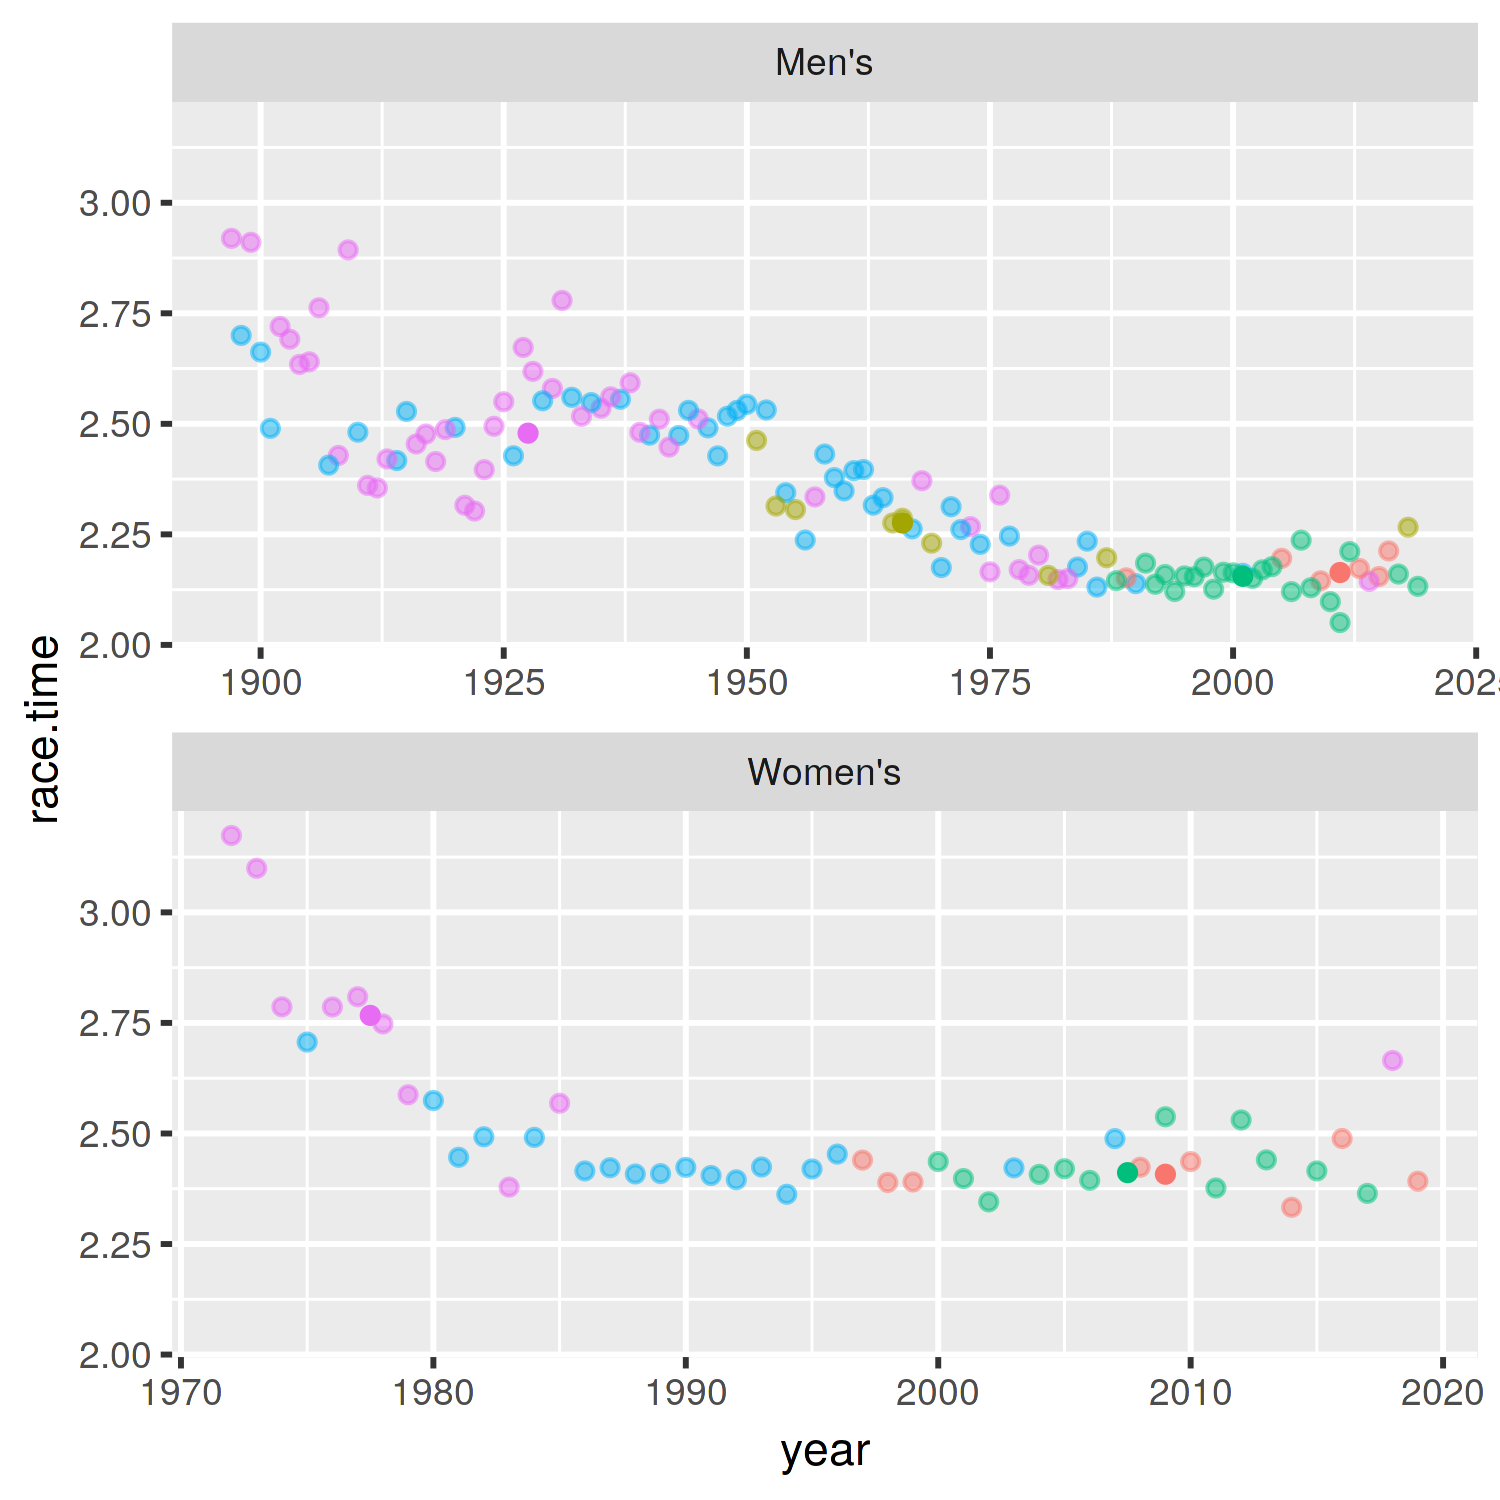

In [31]:
df.label = df.marathon %>%
    filter(country.simple %in% c("United States","Japan","Kenya","Ethiopia")) %>%
    group_by(MF, country.simple) %>%
    summarize(median.year=median(year), median.time=median(race.time))
    

options(repr.plot.res = 300, repr.plot.width = 5, repr.plot.height = 5)
p = ggplot(df.marathon, aes(x=year, y=race.time, color=country.simple))
p = p + geom_point(alpha=0.5)
p = p + facet_wrap(~MF,ncol=1,scales="free_x")
p = p + theme(legend.position="none") 
p = p + geom_point(data=df.label, aes(x=median.year, y=median.time))
p

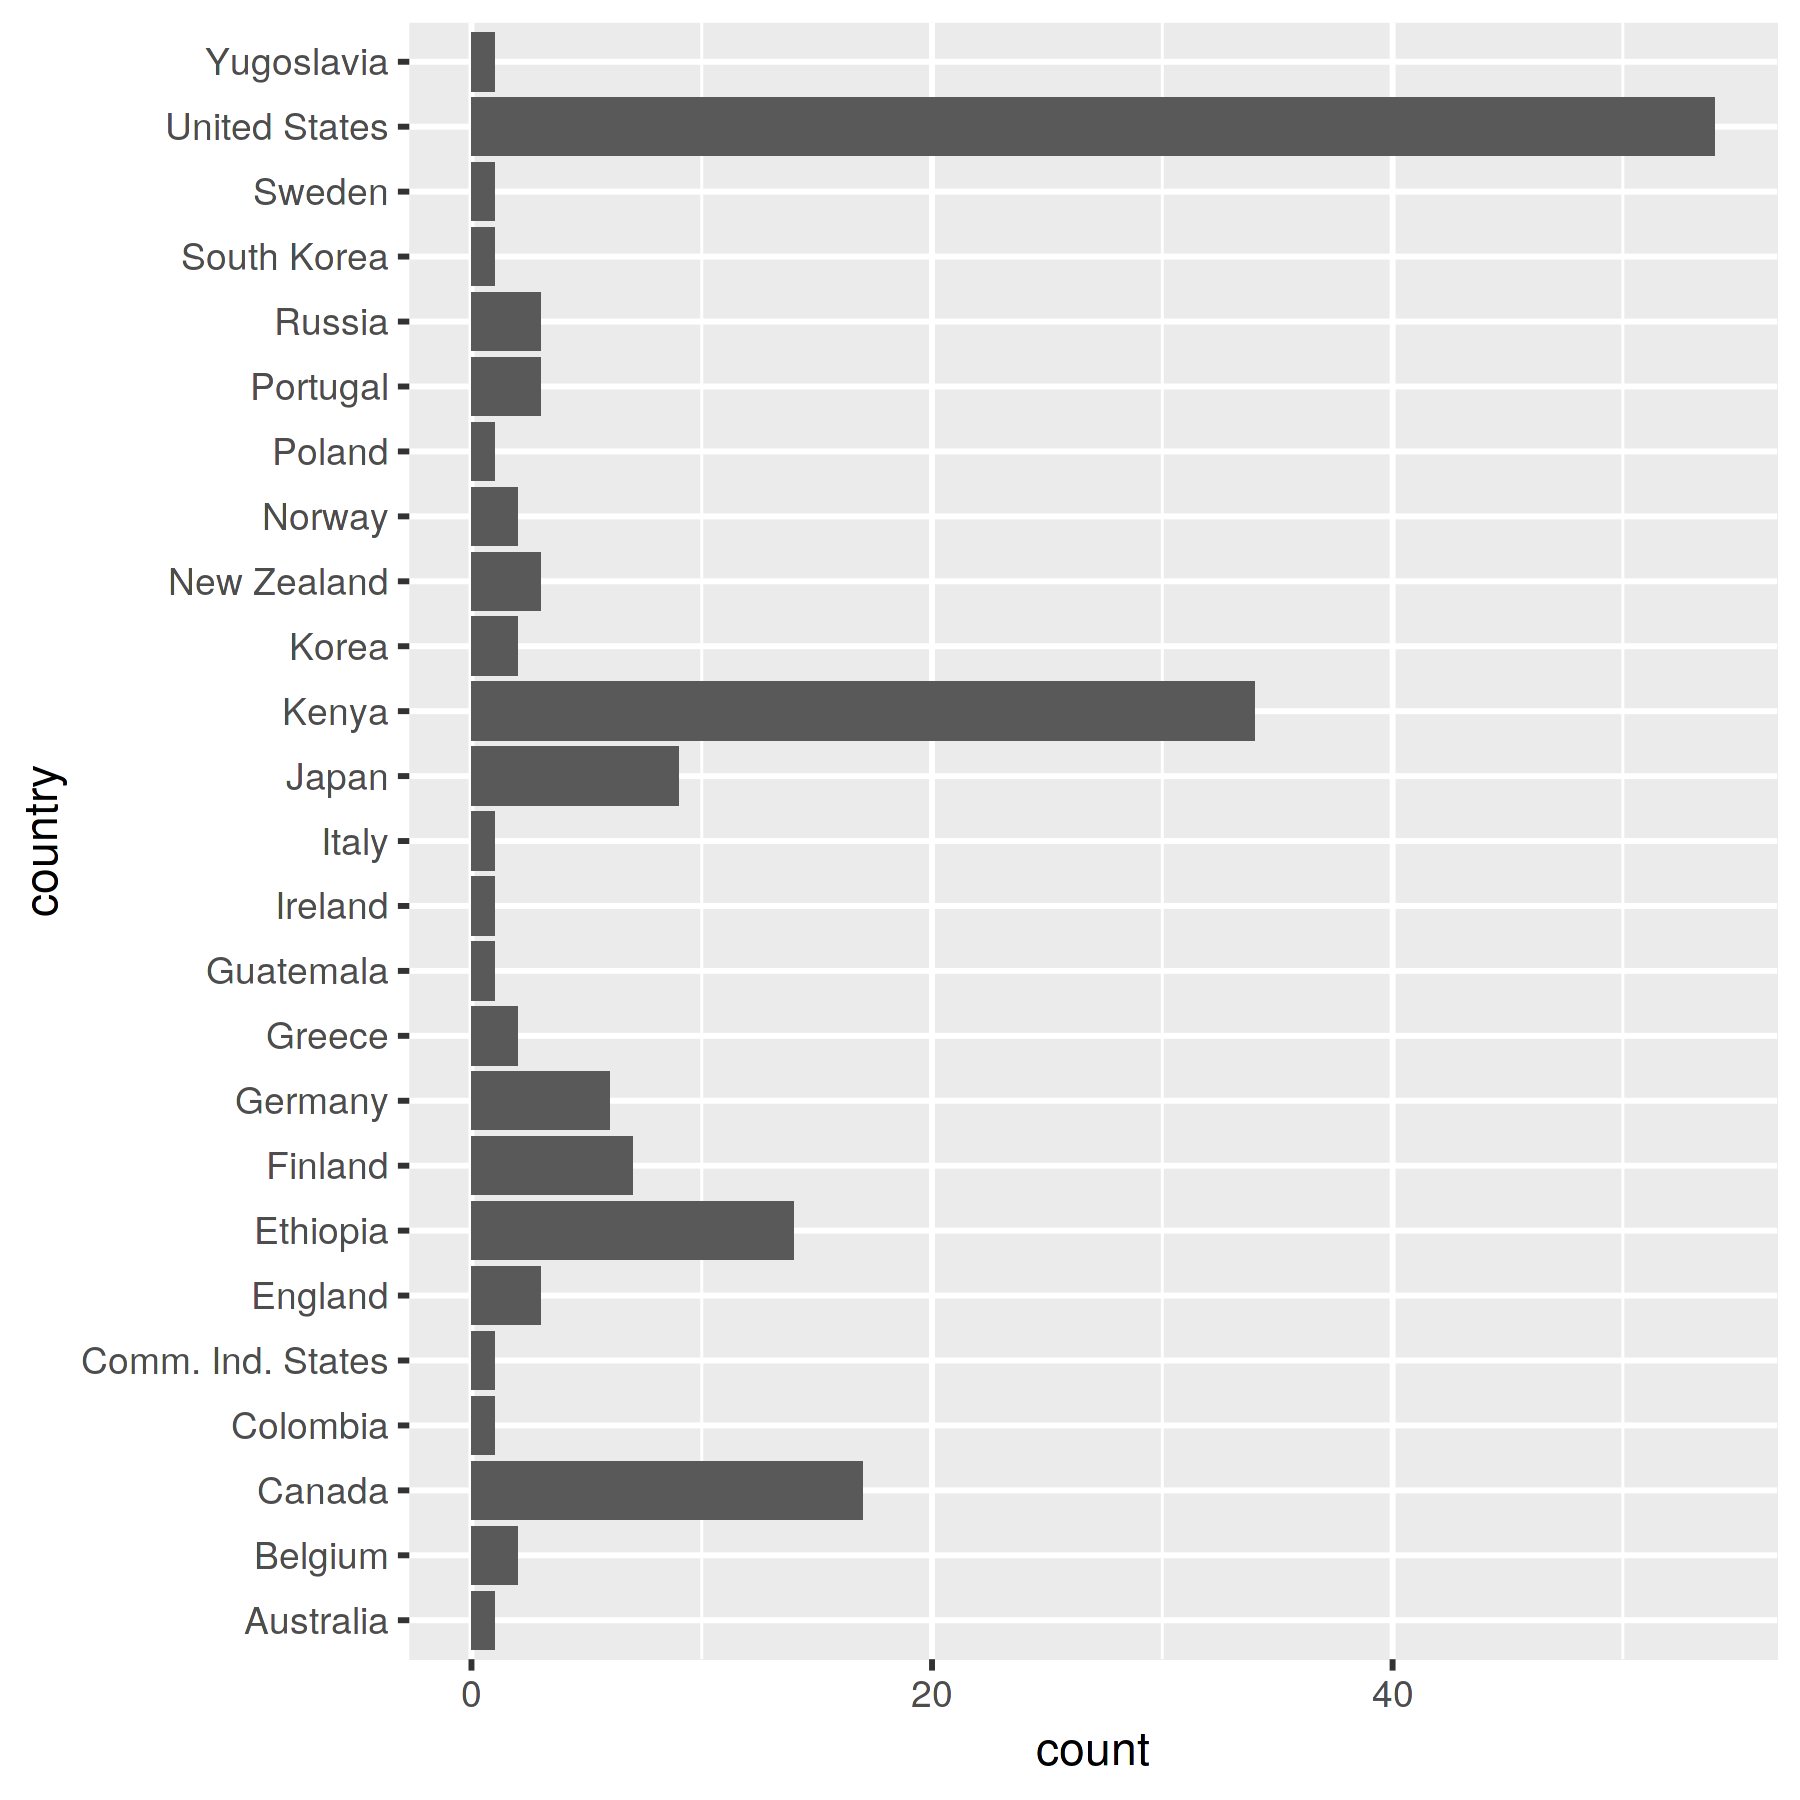

In [22]:
# Visualize which countries have the highest number of winners

p = ggplot(df.marathon,aes(x=country))
p = p + geom_bar()
p = p + coord_flip()
p